<a href="https://colab.research.google.com/github/kawin-pixel/real_estate_th/blob/main/R_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data preparation

In [ ]:
library(dbplyr)
library(ggplot2)
library(tidyverse)
library(stats)
library(readxl)

##source: https://www.kaggle.com/datasets/krityodp/condominium-data-in-bangkok
## as of Jun 2023, data source: scrapped from propertyhub.com

data <- read_excel("/content/sample_data/202306.xlsx")

## [1] change existing floor column into number
data <- data %>%
  mutate(new_floor = gsub("[^0-9]", "", floor))
data$new_floor <- as.numeric(data$new_floor)

## [2] change existing sQM into column into number
data <- data %>%
  mutate(new_room_size = gsub("sq.m.", "", room_size))## use gsub to extract number but keep decimal
data$new_room_size <- as.numeric(data$new_room_size)

## [3] calculate rental per sqm
data <- data %>%
  mutate(rental_to_sqm = rental/new_room_size)

## [4] add count_column
data$count <- 1

##[5] Aggregated data
data <- data %>%
  mutate(update_date = as.Date(data$last_update)) ##turn posixct to normal date

##Daily data
agg_data <- data %>%
  group_by(update_date, unit_type) %>%
  summarise(
    total_count = sum(count),
    avg_rental = mean(rental)
    )

#By unit type
agg_data2 <- data %>%
  group_by(unit_type) %>%
  summarise(
    total_count = sum(count),
    avg_rental = mean(rental),
    avg_sqm = mean(new_room_size)
    )

#By Project_name
by_project <- data %>%
  group_by(project_name, project_id, unit_type) %>%
  summarise(
    total_count = sum(count),
    avg_rental = mean(rental),
    avg_sqm = mean(new_room_size)
  )



In [86]:
## Display data

head(agg_data2)

agg_data2 <- agg_data2 %>%
  mutate(rental_to_sqm = avg_rental/avg_sqm)

print(agg_data2)

unit_type,total_count,avg_rental,avg_sqm
<chr>,<dbl>,<dbl>,<dbl>
1 Bedroom,6118,26317.68,42.75102
2 Bedroom,3048,57479.32,104.26192
3 Bedroom,411,134948.91,194.56343
4 Bedroom,65,187661.54,286.04523
Duplex 1 Bedroom,129,34158.14,47.62806
Duplex 2 Bedroom,46,48793.48,65.00804


# A tibble: 11 × 5
   unit_type        total_count avg_rental avg_sqm rental_to_sqm
   <chr>                  <dbl>      <dbl>   <dbl>         <dbl>
 1 1 Bedroom               6118     26318.    42.8          616.
 2 2 Bedroom               3048     57479.   104.           551.
 3 3 Bedroom                411    134949.   195.           694.
 4 4 Bedroom                 65    187662.   286.           656.
 5 Duplex 1 Bedroom         129     34158.    47.6          717.
 6 Duplex 2 Bedroom          46     48793.    65.0          751.
 7 Duplex 3 Bedroom           2     72500    115            630.
 8 Duplex 4 Bedroom           9    250000    372.           671.
 9 Moff                       6     25500     78            327.
10 Penthouse                  4    160000    261            613.
11 Studio                   474     16852.    34.4          491.


#Overview

Chart
*   Font used: noto sans
*   Theme used: classic or bw

Monthly rental vs roomsize (sqm)

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


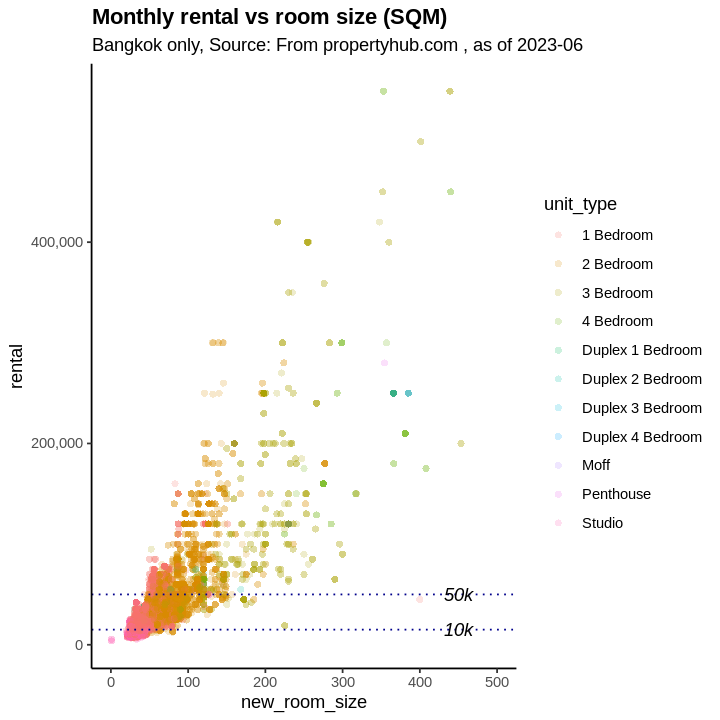

In [28]:
## Chart codes --------------
  options(repr.plot.width=6, repr.plot.height=6, dpi = 600) ##adjust chart size

  ggplot(data, mapping = aes(x = new_room_size, y = rental, fill = unit_type)) +
  geom_point(shape = 21, stroke = NA, size = 2, alpha = 0.2) +
  scale_x_continuous(limits = c(0,500)) +
  scale_y_continuous(labels = scales::comma) +
  geom_hline(yintercept = 15000, color = "darkblue",  linetype = "dotted") +
  annotate ("text", x = 450, y = 15000, label = "10k", fontface = "italic") +
  geom_hline(yintercept = 50000, color = "darkblue",  linetype = "dotted") +
  annotate ("text", x = 450, y = 50000, label = "50k", fontface = "italic") +
  ## theme and label
  theme_classic() +
  theme(plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  labs(title = "Monthly rental vs room size (SQM)",
        subtitle = "Bangkok only, Source: From propertyhub.com , as of 2023-06")


Monthly rental price vs room size (SQM) breakdown by unit type

Warning message in geom_boxplot(shape = 21, stroke = NA):
“Ignoring unknown parameters: `stroke`”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


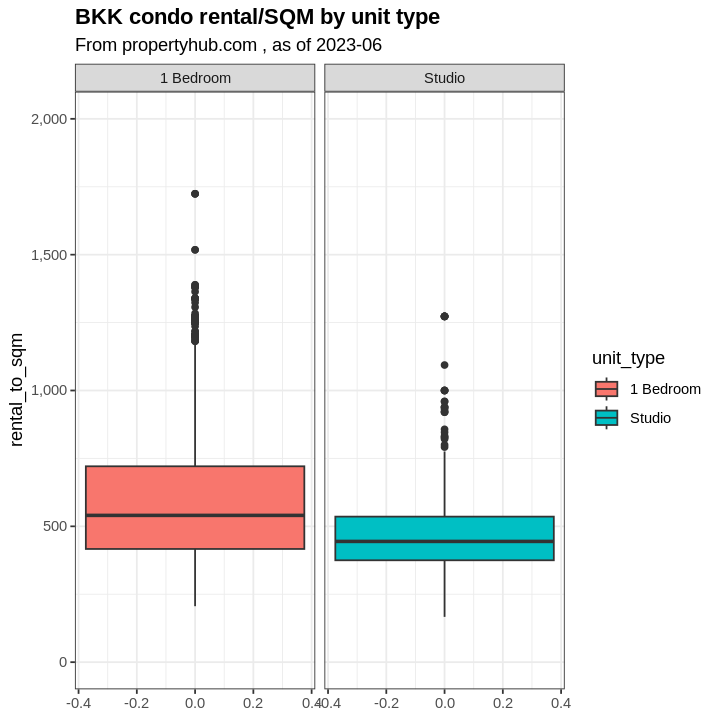

In [29]:
#rental studio and 1br only
ggplot(subset(data, unit_type == c("1 Bedroom", "Studio")), mapping = aes(y = rental_to_sqm, fill = unit_type)) +
  geom_boxplot(shape = 21, stroke = NA) +
  scale_y_continuous(limits = c(0,2000), labels = scales::comma) +
  facet_wrap(~ unit_type) +

  ## theme and label
  theme_bw() +
  theme(plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  labs(title = "BKK condo rental/SQM by unit type", subtitle = "From propertyhub.com , as of 2023-06")


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


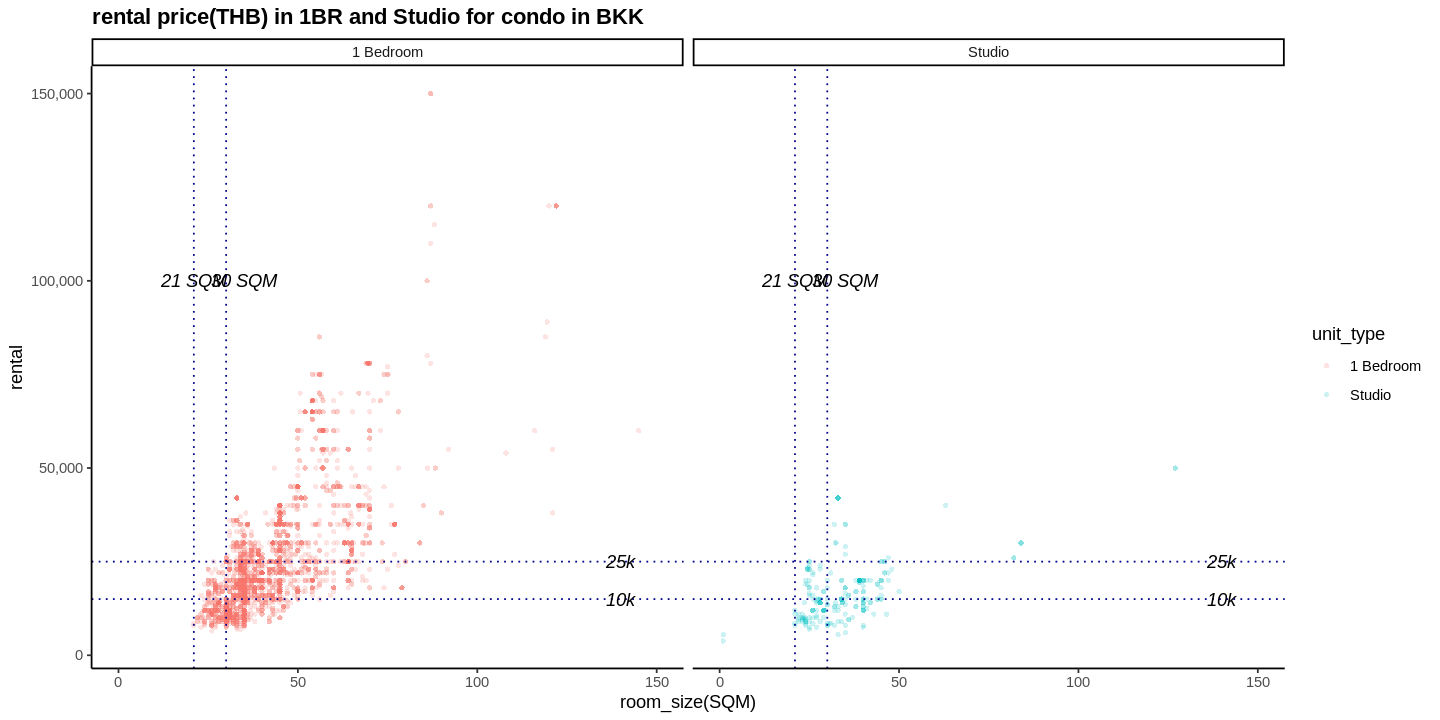

In [38]:
#rental vs room size studio and 1br only
options(repr.plot.width=12, repr.plot.height=6, dpi = 600) ##adjust chart size

ggplot(subset(data, unit_type == c("1 Bedroom", "Studio") ), mapping = aes(x = new_room_size, y = rental, fill = unit_type)) +
  geom_point(shape = 21, stroke = NA, alpha = 0.2) +
  scale_x_continuous(limits = c(0,150)) +
  scale_y_continuous(labels = scales::comma) +

  ## rental range
  geom_hline(yintercept = 15000, color = "darkblue",  linetype = "dotted") +
  annotate ("text", x = 140, y = 15000, label = "10k", fontface = "italic") +
  geom_hline(yintercept = 25000, color = "darkblue",  linetype = "dotted") +
  annotate ("text", x = 140, y = 25000, label = "25k", fontface = "italic") +

  ## SQM range
  geom_vline(xintercept = 21, color = "darkblue",  linetype = "dotted") +
  annotate ("text", x = 21, y = 100000, label = "21 SQM", fontface = "italic") +
  geom_vline(xintercept = 30, color = "darkblue",  linetype = "dotted") +
  annotate ("text", x = 35, y = 100000, label = "30 SQM", fontface = "italic") +

  ## theme and label
  theme_classic() +
     theme(plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  facet_wrap(~ unit_type) +
  labs(title = "rental price(THB) in 1BR and Studio for condo in BKK",
       x = "room_size(SQM)")

Warning message in unit_type == c("1 Bedroom", "Studio", "2 Bedroom", "3 Bedroom", :
“longer object length is not a multiple of shorter object length”
Warning message:
“Removed 76 rows containing missing values or values outside the scale range
(`geom_point()`).”


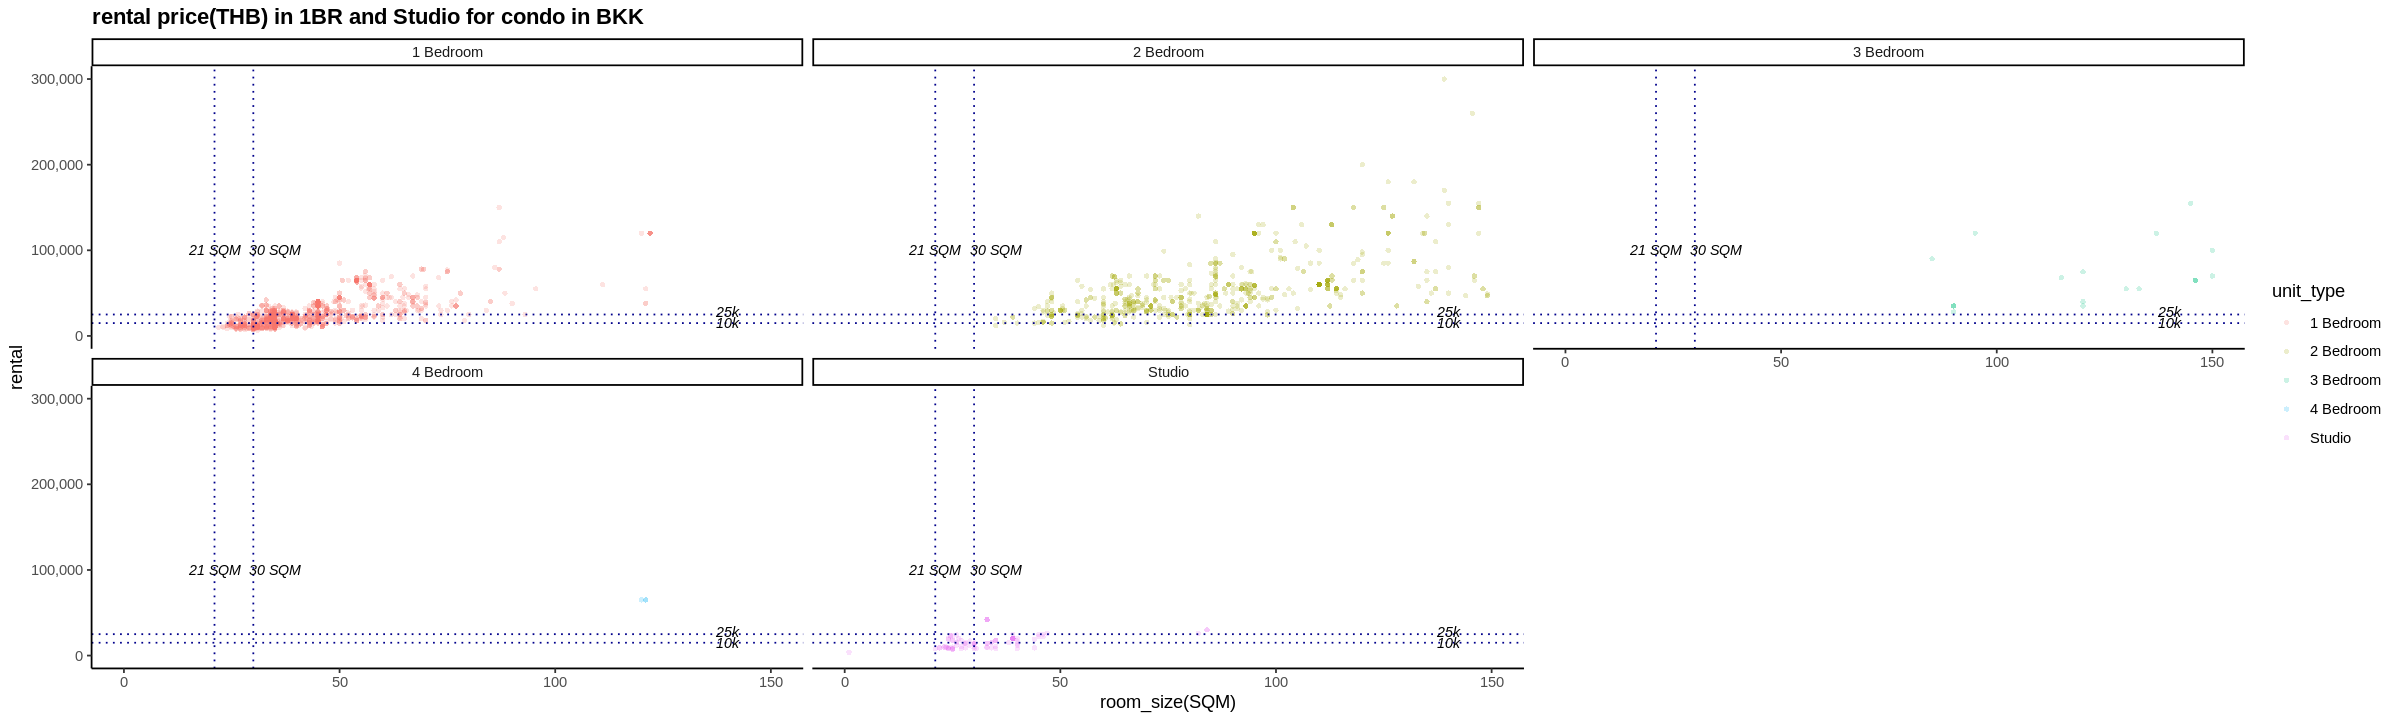

In [9]:
#rental vs room size studio 1br, 2br, 3br, 4br only
options(repr.plot.width=20, repr.plot.height=6, dpi = 600) ##adjust chart size

ggplot(subset(data, unit_type == c("1 Bedroom", "Studio", "2 Bedroom", "3 Bedroom", "4 Bedroom") ),
mapping = aes(x = new_room_size, y = rental, fill = unit_type)) +
  geom_point(shape = 21, stroke = NA, alpha = 0.2) +
  scale_x_continuous(limits = c(0,150)) +
  scale_y_continuous(limits = c(0,300000),
                     labels = scales::comma) +

  ## rental range
  geom_hline(yintercept = 15000, color = "darkblue",  linetype = "dotted") +
  annotate ("text", x = 140, y = 15000, label = "10k", fontface = "italic", size = 3) +
  geom_hline(yintercept = 25000, color = "darkblue",  linetype = "dotted") +
  annotate ("text", x = 140, y = 28000, label = "25k", fontface = "italic", size = 3) +

  ## SQM range
  geom_vline(xintercept = 21, color = "darkblue",  linetype = "dotted") +
  annotate ("text", x = 21, y = 100000, label = "21 SQM", fontface = "italic" , size = 3) +
  geom_vline(xintercept = 30, color = "darkblue",  linetype = "dotted") +
  annotate ("text", x = 35, y = 100000, label = "30 SQM", fontface = "italic" , size = 3) +

  ## theme and label
  theme_classic() +
    theme(plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  facet_wrap(~ unit_type) +
  labs(title = "rental price(THB) in 1BR and Studio for condo in BKK",
       x = "room_size(SQM)")

Warning message:
“Removed 1066 rows containing missing values or values outside the scale range
(`geom_point()`).”


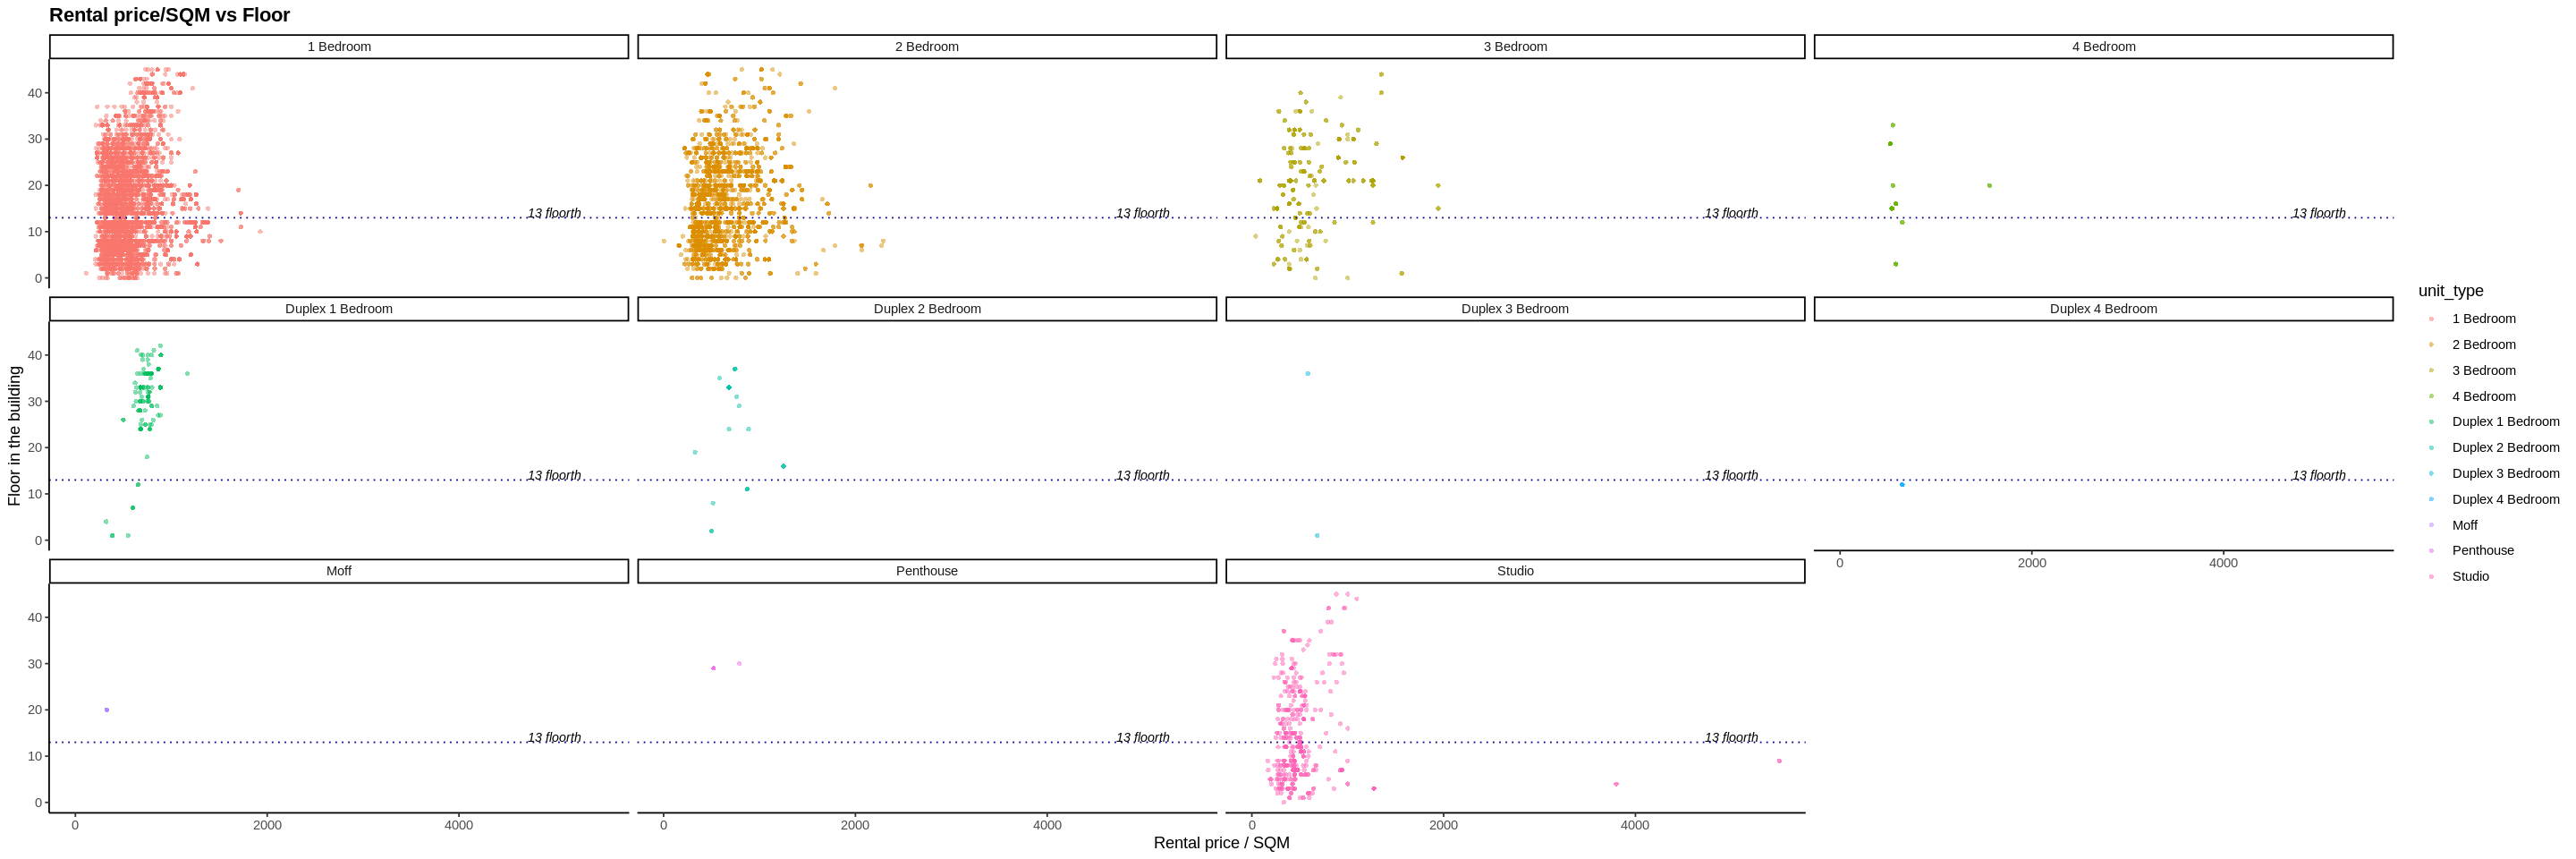

In [36]:
#rental sqm vs floor
options(repr.plot.width=24, repr.plot.height=8, dpi = 600)

ggplot(data, mapping = aes(x = rental_to_sqm, y = new_floor, fill = unit_type)) +
  geom_point(shape = 21, stroke = NA, alpha = 0.5) +
  scale_x_continuous() + #0.97 quantile
  scale_y_continuous(limits = c(0,45), labels = scales::comma) +
  geom_hline(yintercept = 13, color = "darkblue",  linetype = "dotted") +
  annotate ("text", x = 5000, y = 14, label = "13 floorth", fontface = "italic" , size = 3) +

## theme and label
  theme_classic() +
    theme(plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  facet_wrap(~ unit_type) +
  labs(title = "Rental price/SQM vs Floor",
       x = "Rental price / SQM",
       y = "Floor in the building")

# Monthly rent vs room size by project

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


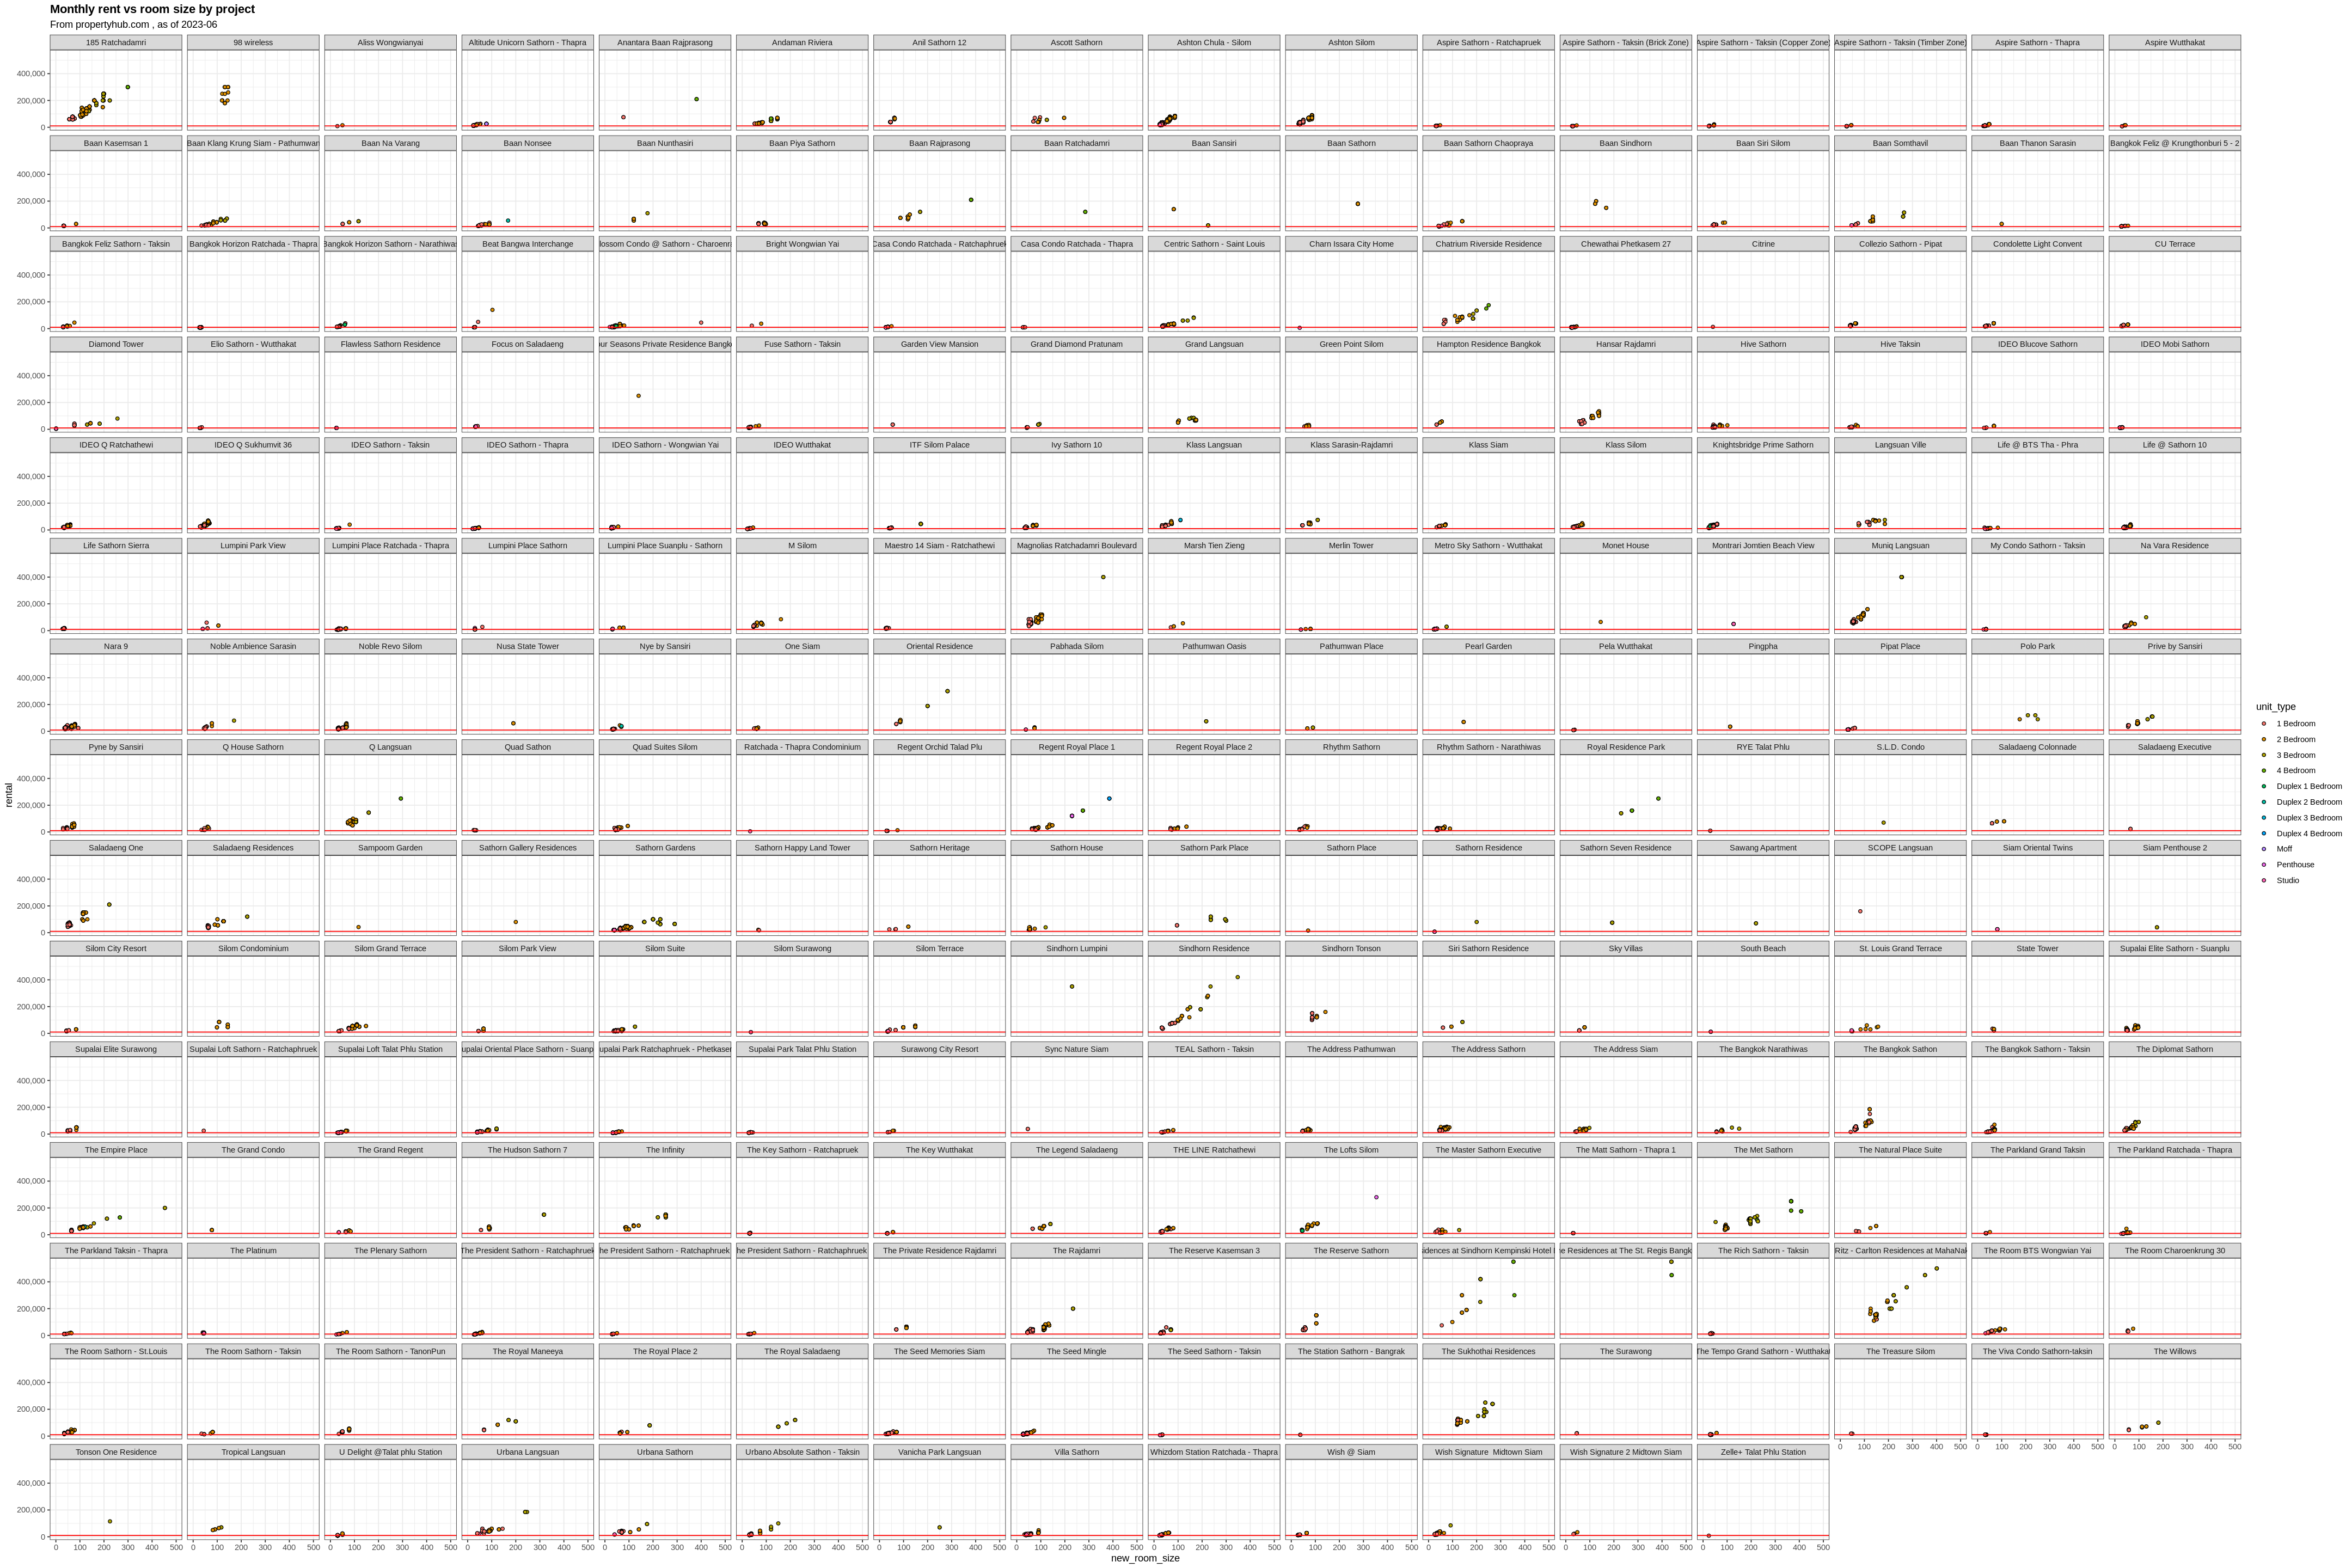

In [6]:
#rental vs room size by project
  options(repr.plot.width=36, repr.plot.height=24, dpi = 600) ##adjust chart size

ggplot(data, mapping = aes(x = new_room_size, y = rental, fill = unit_type)) +
  geom_point(shape = 21) +
  scale_x_continuous(limits = c(0,500)) +
  scale_y_continuous(labels = scales::comma) +
  geom_hline(yintercept = 10000, color = "red") +
  facet_wrap(~ project_name) +
  ## theme and label
  theme_bw() +
  theme(plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  labs(title = "Monthly rent vs room size by project",
        subtitle = "From propertyhub.com , as of 2023-06")

#Aggregated data

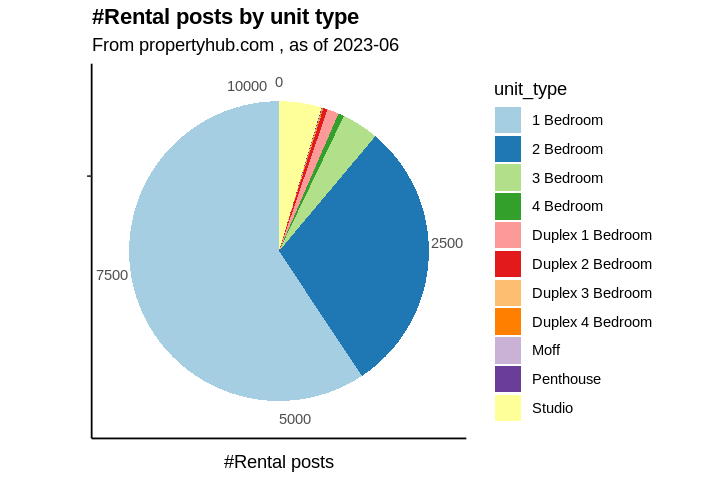

In [41]:
#supply overview pie
options(repr.plot.width=6, repr.plot.height=4, dpi = 600) ##adjust chart size

ggplot(agg_data, mapping = aes (x = " ", y = total_count, fill = unit_type)) +
  geom_col() +
  coord_polar(theta = "y") +
  scale_fill_brewer(palette = "Paired") +

#theme and label
  theme_classic() +
  theme(plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  labs(title = "#Rental posts by unit type",
        subtitle = "From propertyhub.com , as of 2023-06",
        x = "",
        y = "#Rental posts")

In [ ]:
#Avg room size vs avg rental by unit type
options(repr.plot.width=12, repr.plot.height=6, dpi = 600) ##adjust chart size

ggplot(agg_data2, mapping = aes (x = avg_rental, y = avg_sqm,
                                fill = unit_type,
                                size = total_count)) +
  geom_point(shape = 21) +
  ## theme and label
  theme_classic() +
  labs(title = "#Avg room size vs Avg rental",
       subtitle = "Bangkok only, Source: From propertyhub.com , as of 2023-06")

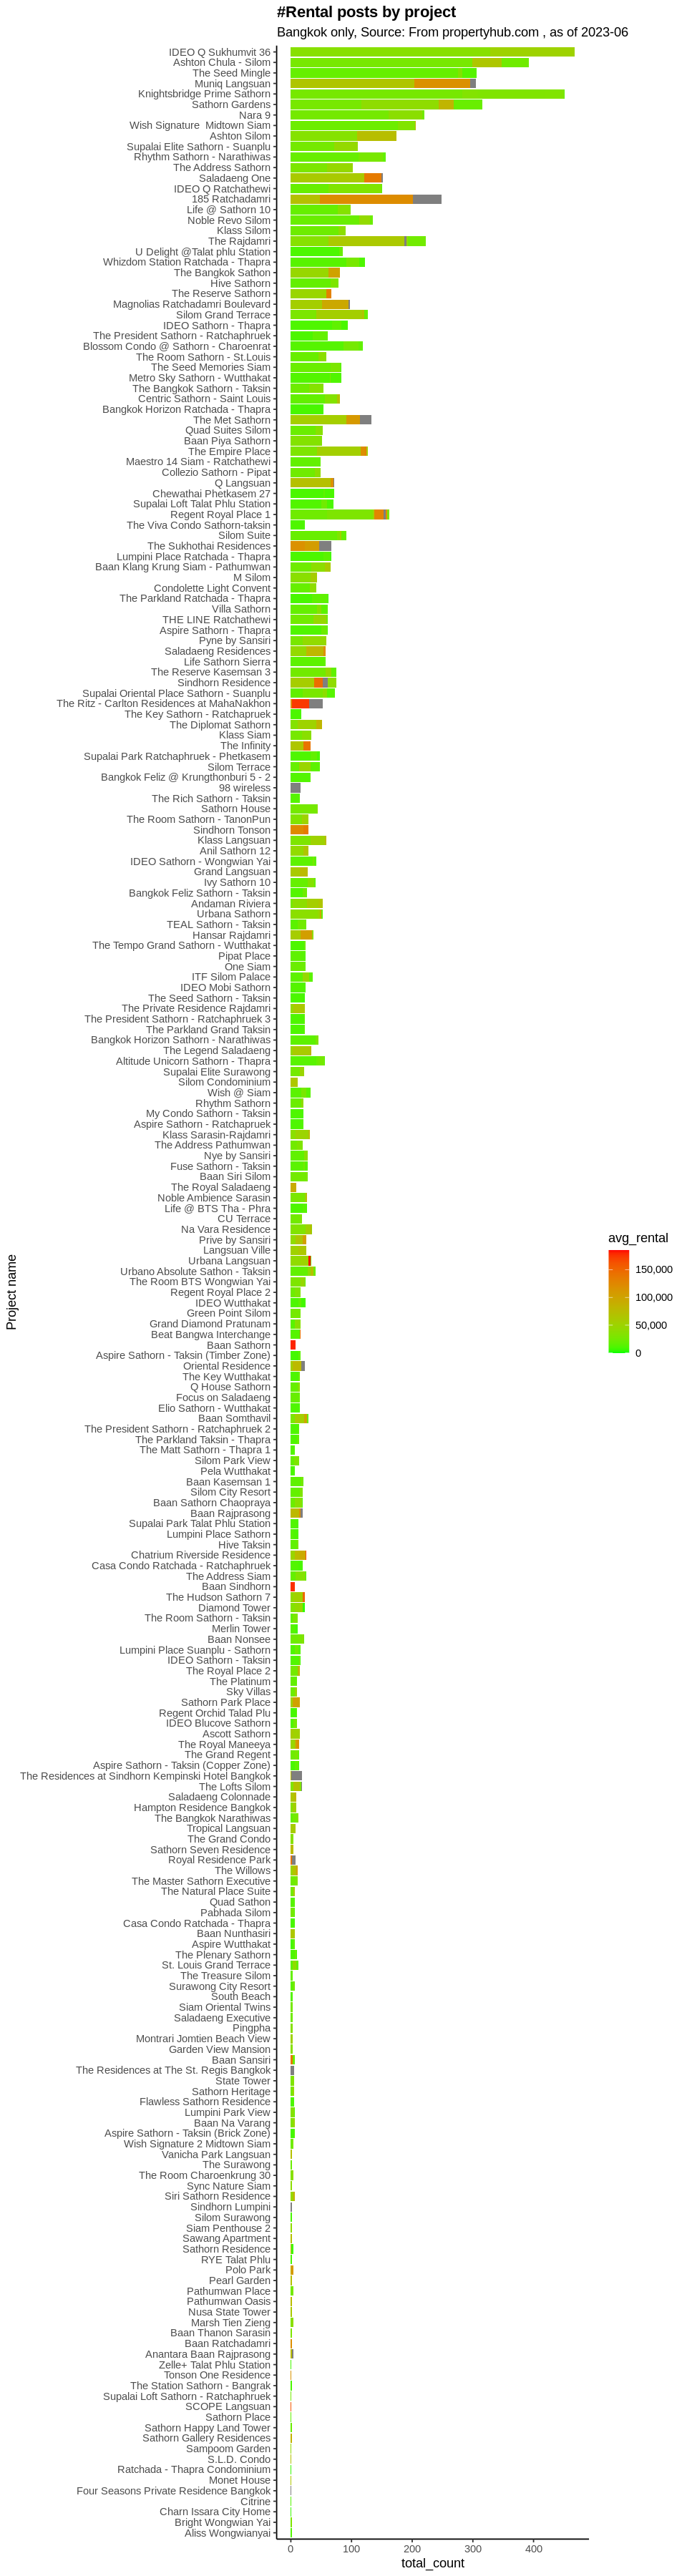

In [62]:
#supply overview bar by project
options(repr.plot.width = 8, repr.plot.height = 30, dpi = 600) ##adjust chart size

ggplot(by_project, mapping = aes (reorder(x = project_name, total_count),
                                  y = total_count, fill = avg_rental)) +
  geom_col() +
  coord_flip() +
  scale_fill_gradient(limits = c(0,185000),
                      high = "red", low = "green",
                      labels = scales::comma) +

  ## theme and label
  theme_classic() +
  theme(plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  labs(title = "#Rental posts by project",
       subtitle = "Bangkok only, Source: From propertyhub.com , as of 2023-06",
       x = "Project name")

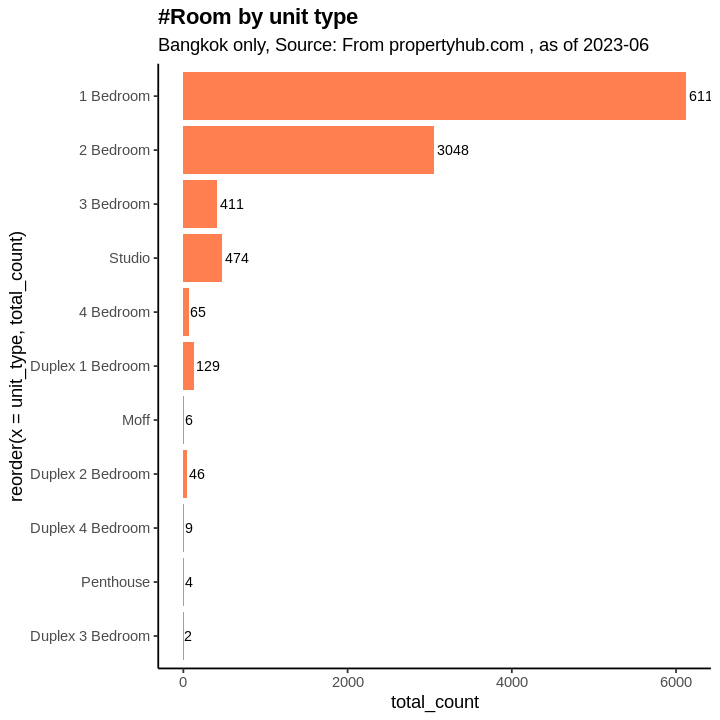

In [76]:
#supply overview bar
options(repr.plot.width = 6, repr.plot.height = 6, dpi = 600) ##adjust chart size

ggplot(agg_data, mapping = aes (reorder(x = unit_type, total_count),
                                y = total_count )) +
  geom_col( fill = "coral") +
  geom_text(agg_data2, mapping = aes (label = total_count),
            hjust = -0.1, size = 3) +
  coord_flip() +
  ## theme and label
  theme_classic() +
    theme(plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  labs(title = "#Room by unit type",
       subtitle = "Bangkok only, Source: From propertyhub.com , as of 2023-06")

No. of rental post daily

In [92]:
#supply overview daily
options(repr.plot.width = 30, repr.plot.height = 6, dpi = 600) ##adjust chart size

ggplot(agg_data, mapping = aes (x = update_date, y = total_count, fill = unit_type)) +
  geom_area(position = "stack") +
  scale_y_continuous(labels = scales::comma) +
  scale_x_date( date_breaks = "1 month",
                date_labels = "%b-%y") +
  theme_classic()

head(agg_data2)

unit_type,total_count,avg_rental,avg_sqm,rental_to_sqm
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1 Bedroom,6118,26317.68,42.75102,615.6036
2 Bedroom,3048,57479.32,104.26192,551.2974
3 Bedroom,411,134948.91,194.56343,693.5985
4 Bedroom,65,187661.54,286.04523,656.0555
Duplex 1 Bedroom,129,34158.14,47.62806,717.1852
Duplex 2 Bedroom,46,48793.48,65.00804,750.5760


unit_type,total_count,avg_rental,avg_sqm,rental_to_sqm
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1 Bedroom,6118,26317.68,42.75102,615.6036
2 Bedroom,3048,57479.32,104.26192,551.2974
3 Bedroom,411,134948.91,194.56343,693.5985
4 Bedroom,65,187661.54,286.04523,656.0555
Duplex 1 Bedroom,129,34158.14,47.62806,717.1852
Duplex 2 Bedroom,46,48793.48,65.00804,750.5760


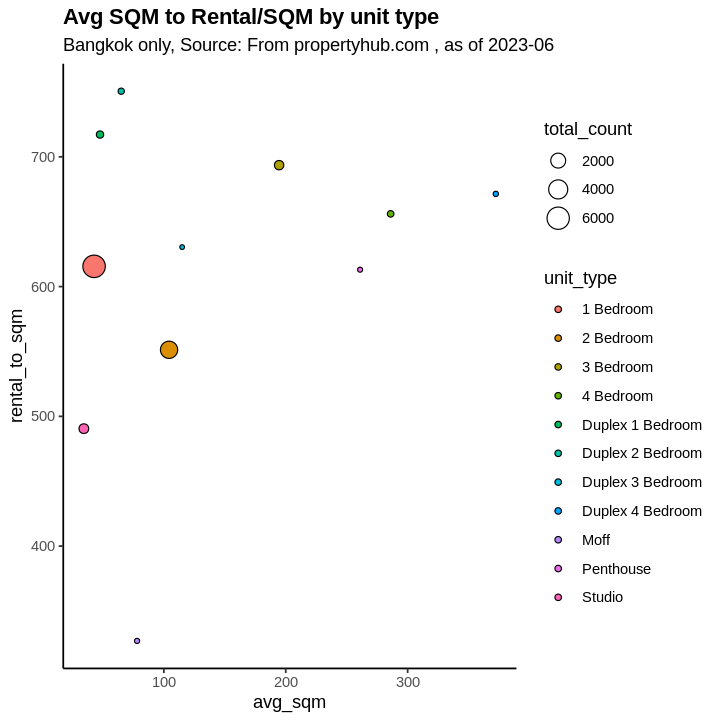

In [97]:
options(repr.plot.width = 6, repr.plot.height = 6, dpi = 600) ##adjust chart size

ggplot(agg_data2, mapping = aes (x = avg_sqm, y = rental_to_sqm,
                                fill = unit_type, size = total_count)) +
  geom_point(shape = 21) +
  scale_y_continuous(labels = scales::comma) +

  ## theme and label
  theme_classic() +
    theme(plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  labs(title = "Avg SQM to Rental/SQM by unit type",
       subtitle = "Bangkok only, Source: From propertyhub.com , as of 2023-06")

head(agg_data2)

#All code

In [98]:
library(dbplyr)
library(ggplot2)
library(tidyverse)
library(ggrepel)
library(stats)
library(readxl)

##source: https://www.kaggle.com/datasets/krityodp/condominium-data-in-bangkok
## as of Jun 2023, data source: scrapped from propertyhub.com

data <- read_excel("202306.xlsx")

## [1] change existing floor column into number
data <- data %>%
  mutate(new_floor = gsub("[^0-9]", "", floor))
data$new_floor <- as.numeric(data$new_floor)

## [2] change existing sQM into column into number
data <- data %>%
  mutate(new_room_size = gsub("sq.m.", "", room_size))## use gsub to extract number but keep decimal
data$new_room_size <- as.numeric(data$new_room_size)

## [3] calculate rental per sqm
data <- data %>%
  mutate(rental_to_sqm = rental/new_room_size)

## Chart codes --------------

#rental vs room size BKK overview
ggplot(data, mapping = aes(x = new_room_size, y = rental, fill = unit_type)) +
  geom_point(shape = 21, stroke = NA, size = 2) +
  scale_x_continuous(limits = c(0,500)) +
  scale_y_continuous(labels = scales::comma) +
  geom_hline(yintercept = 15000, color = "darkblue",  linetype = "dotted") +
  annotate ("text", x = 450, y = 15000, label = "฿10k", fontface = "italic") +
  geom_hline(yintercept = 50000, color = "darkblue",  linetype = "dotted") +
  annotate ("text", x = 450, y = 50000, label = "฿50k", fontface = "italic") +
  ## theme and label
  theme_classic() +
  labs(title = "Rental price vs room size", subtitle = "Bangkok only, Source: From propertyhub.com , as of 2023-06")


#rental vs room size by project
ggplot(data, mapping = aes(x = new_room_size, y = rental, fill = unit_type)) +
  geom_point(shape = 21) +
  scale_x_continuous(limits = c(0,500)) +
  scale_y_continuous(labels = scales::comma) +
  geom_hline(yintercept = 10000, color = "red") +
  facet_wrap(~ project_name)

#rental studio and 1br only
ggplot(subset(data, unit_type == c("1 Bedroom", "Studio")), mapping = aes(y = rental_to_sqm, fill = unit_type)) +
  geom_boxplot(shape = 21, stroke = NA) +
  scale_y_continuous(limits = c(0,2000), labels = scales::comma) +
  facet_wrap(~ unit_type) +
  ## theme and label
  theme_classic() +
  labs(title = "BKK condo rental price/SQM by unit type", subtitle = "From propertyhub.com , as of 2023-06")

quantile(data$rental_to_sqm, 0.95)

#rental vs room size studio and 1br only
ggplot(subset(data, unit_type == c("1 Bedroom", "Studio") ), mapping = aes(x = new_room_size, y = rental, fill = unit_type)) +
  geom_point(shape = 21, stroke = NA) +
  scale_x_continuous(limits = c(0,150)) +
  scale_y_continuous(labels = scales::comma) +

  ## rental range
  geom_hline(yintercept = 15000, color = "darkblue",  linetype = "dotted") +
  annotate ("text", x = 140, y = 15000, label = "฿10k", fontface = "italic") +
  geom_hline(yintercept = 25000, color = "darkblue",  linetype = "dotted") +
  annotate ("text", x = 140, y = 25000, label = "฿25k", fontface = "italic") +

  ## SQM range
  geom_vline(xintercept = 21, color = "darkblue",  linetype = "dotted") +
  annotate ("text", x = 21, y = 100000, label = "21 SQM", fontface = "italic") +
  geom_vline(xintercept = 30, color = "darkblue",  linetype = "dotted") +
  annotate ("text", x = 35, y = 100000, label = "30 SQM", fontface = "italic") +

  theme_classic() +
  facet_wrap(~ unit_type) +
  labs(title = "rental price(THB) in 1BR and Studio for condo in BKK",
       x = "room_size(SQM)")

#rental vs room size studio 1br, 2br, 3br, 4br only
ggplot(subset(data, unit_type == c("1 Bedroom", "Studio", "2 Bedroom", "3 Bedroom", "4 Bedroom") ), mapping = aes(x = new_room_size, y = rental, fill = unit_type)) +
  geom_point(shape = 21, stroke = NA) +
  scale_x_continuous(limits = c(0,150)) +
  scale_y_continuous(limits = c(0,300000),
                     labels = scales::comma) +

  ## rental range
  geom_hline(yintercept = 15000, color = "darkblue",  linetype = "dotted") +
  annotate ("text", x = 140, y = 15000, label = "฿10k", fontface = "italic", size = 3) +
  geom_hline(yintercept = 25000, color = "darkblue",  linetype = "dotted") +
  annotate ("text", x = 140, y = 28000, label = "฿25k", fontface = "italic", size = 3) +

  ## SQM range
  geom_vline(xintercept = 21, color = "darkblue",  linetype = "dotted") +
  annotate ("text", x = 21, y = 100000, label = "21 SQM", fontface = "italic" , size = 3) +
  geom_vline(xintercept = 30, color = "darkblue",  linetype = "dotted") +
  annotate ("text", x = 35, y = 100000, label = "30 SQM", fontface = "italic" , size = 3) +

  theme_classic() +
  facet_wrap(~ unit_type) +
  labs(title = "rental price(THB) in 1BR and Studio for condo in BKK",
       x = "room_size(SQM)")


#rental sqm vs floor
ggplot(data, mapping = aes(x = rental_sqm, y = new_floor, fill = unit_type)) +
  geom_point(shape = 21, stroke = NA) +
  scale_x_continuous() + #0.97 quantile
  scale_y_continuous(limits = c(0,40), labels = scales::comma)



ERROR: Error in library(ggrepel): there is no package called ‘ggrepel’
